# Spacial Vectorization

Spatial vectorization refers to a situation where elements share the same computation but are in interaction with only a subgroup of other elements. This was already the case for the game of life example, but in some situations there is an added difficulty because the subgroup is dynamic and needs to be updated at each iteration. This the case, for example, in particle systems where particles interact mostly with local neighbours. This is also the case for "boids" that simulate flocking behaviors.

![image](https://www.labri.fr/perso/nrougier/from-python-to-numpy/data/Fugle-cropped.jpg)

## Now what are Boids?

_Note:_
_The following description is taken from the Wikipedia entry Boids_


Boids is an artificial life program, developed by Craig Reynolds in 1986, which simulates the flocking behaviour of birds. The name "boid" corresponds to a shortened version of "bird-oid object", which refers to a bird-like object.
As with most artificial life simulations, Boids is an example of emergent behavior; that is, the complexity of Boids arises from the interaction of individual agents (the boids, in this case) adhering to a set of simple rules. The rules applied in the simplest Boids world are as follows:

- **separation**: steer to avoid crowding local flock-mates
- **alignment**: steer towards the average heading of local flock-mates
- **cohesion**: steer to move toward the average position (center of mass) of local flock-mates

![image](https://www.labri.fr/perso/nrougier/from-python-to-numpy/data/boids.png)

## Import the Necessary libraries

run the below command if you are not using google colab

In [ ]:
%pip install matplotlib numpy

In [4]:
import numpy as np
import matplotlib.pyplot as plt # for plotting
from matplotlib.path import Path # for drawing shapes
from matplotlib.animation import FuncAnimation # for animating
from matplotlib.collections import PathCollection # for drawing shapes


### Numpy implementation

Class for Boids modeling

In [5]:
class MarkerCollection:
    """
    Boids marker collection
    """

    def __init__(self, n: int = 100) -> None:
        """Initialize the marker collection

        Parameters
        ----------
        n : int, optional
            number of markers, by default 100
        """
        v = np.array([(-0.25, -0.25), (+0.0, +0.5), (+0.25, -0.25), (0, 0)])
        c = np.array([Path.MOVETO, Path.LINETO, Path.LINETO, Path.CLOSEPOLY])
        self._base_vertices = np.tile(v.reshape(-1), n).reshape(n, len(v), 2)
        self._vertices = np.tile(v.reshape(-1), n).reshape(n, len(v), 2)
        self._codes = np.tile(c.reshape(-1), n)

        self._scale = np.ones(n)
        self._translate = np.zeros((n, 2))
        self._rotate = np.zeros(n)

        self._path = Path(vertices=self._vertices.reshape(n * len(v), 2),
                          codes=self._codes)
        self._collection = PathCollection([self._path],
                                          linewidth=0.5,
                                          facecolor="k",
                                          edgecolor="w")

    def update(self):
        """Update the marker collection
        """
        n = len(self._base_vertices)
        self._vertices[...] = self._base_vertices * self._scale
        cos_rotate, sin_rotate = np.cos(self._rotate), np.sin(self._rotate)
        R = np.empty((n, 2, 2))
        R[:, 0, 0] = cos_rotate
        R[:, 1, 0] = sin_rotate
        R[:, 0, 1] = -sin_rotate
        R[:, 1, 1] = cos_rotate
        self._vertices[...] = np.einsum('ijk,ilk->ijl', self._vertices, R)
        self._vertices += self._translate.reshape(n, 1, 2)

Now your task is to complete the below code - Fill in the `#TODO` sections

In [6]:
class Flock:
    """ Boids flock Class
    """
    def __init__(self, count:int=500, width:int=640, height:int=360):
        """Initialize the flock

        Parameters
        ----------
        count : int, optional
            count of boids, by default 500
        width : int, optional
            width of the flock, by default 640
        height : int, optional
            height of the flock, by default 360
        """
        # set the flock parameters
        self.width = width
        self.height = height
        self.min_velocity = 0.5
        self.max_velocity = 2.0
        self.max_acceleration = 0.03
        self.velocity = np.zeros((count, 2), dtype=np.float32)
        self.position = np.zeros((count, 2), dtype=np.float32)

        # initialize the flock
        angle = np.random.uniform(0, 2 * np.pi, count)
        self.velocity[:, 0] = np.cos(angle)
        self.velocity[:, 1] = np.sin(angle)
        angle = np.random.uniform(0, 2 * np.pi, count)
        radius = min(width, height) / 2 * np.random.uniform(0, 1, count)
        self.position[:, 0] = width / 2 + np.cos(angle) * radius
        self.position[:, 1] = height / 2 + np.sin(angle) * radius

    def run(self):
        """Run the boid simulation
        """
        # Set up the parameters
        position = self.position
        velocity = self.velocity
        min_velocity = self.min_velocity
        max_velocity = self.max_velocity
        max_acceleration = self.max_acceleration
        n = len(position)

        # The first step is to compute the local neighborhood for all boids, and for this we need to compute all paired distances:
        ###########TODO (~2 lines of code)################
        dx = #TODO Hint: you have to do a outer subtraction of the x coordinates
        dy = #TODO Hint: you have to do a outer subtraction of the y coordinates
        #Your code ends here##############################
        distance = np.hypot(dx, dy)

        # Compute common distance masks
        mask_0 = (distance > 0)
        mask_1 = (distance < 25)
        mask_2 = (distance < 50)
        mask_1 *= mask_0
        mask_2 *= mask_0
        mask_3 = mask_2
        mask_1_count = np.maximum(mask_1.sum(axis=1), 1)
        mask_2_count = np.maximum(mask_2.sum(axis=1), 1)
        mask_3_count = mask_2_count

        
        # Separation 
        # ---------------------------------------------------------------------
        # Compute target
        mask, count = mask_1, mask_1_count
        # Compute the repulsion force from local neighbours
        ###########TODO (~2 lines of code)################
        target = #TODO Hint: you have to compute the stack of dx and dy
        target = #TODO Hint: Force is inversely proportional to the distance
        #Your code ends here##############################
        # Compute direction away from others
        steer = (target * mask.reshape(n, n, 1)).sum(axis=1) / count.reshape(
            n, 1)
        
        # Normalize the Result
        ###########TODO (~1 lines of code)################
        norm = #TODO Hint: you have to compute the norm of the steer
        #Your code ends here##############################
        steer = max_velocity * np.divide(
            steer, norm, out=steer, where=norm != 0)
        steer -= velocity

        # Limit acceleration
        ###########TODO (~1 lines of code)################
        norm = #TODO Hint: you have to compute the norm of the steer
        #Your code ends here##############################
        steer = np.multiply(steer,
                            max_acceleration / norm,
                            out=steer,
                            where=norm > max_acceleration)

        separation = steer

        # Alignment
        # ---------------------------------------------------------------------
        # Compute target
        mask, count = mask_2, mask_2_count
        ###########TODO (~1 lines of code)################
        target = #TODO Hint: you have to compute the average velocity of local neighbours
        #Your code ends here##############################

        # Compute steering
        ###########TODO (~1 lines of code)################
        norm = #TODO Hint: Normalize the result
        #Your code ends here##############################
        target = max_velocity * np.divide(
            target, norm, out=target, where=norm != 0)
        steer = target - velocity

        # Limit acceleration
        ###########TODO (~1 lines of code)################
        norm = #TODO Hint: similar to the separation
        #Your code ends here##############################
        steer = np.multiply(steer,
                            max_acceleration / norm,
                            out=steer,
                            where=norm > max_acceleration)
        alignment = steer

        # Cohesion
        # ---------------------------------------------------------------------
        # Compute target
        mask, count = mask_3, mask_3_count
        ###########TODO (~1 lines of code)################
        target = #TODO Hint: you have to compute the average position of local neighbours
        #Your code ends here##############################

        # Compute steering
        desired = target - position
        ###########TODO (~1 lines of code)################
        norm = #TODO Hint: Normalize the result
        #Your code ends here##############################
        desired *= max_velocity / norm
        steer = desired - velocity

        # Limit acceleration
        ###########TODO (~1 lines of code)################
        norm = #TODO Hint: similar to the allignment
        #Your code ends here##############################
        steer = np.multiply(steer,
                            max_acceleration / norm,
                            out=steer,
                            where=norm > max_acceleration)
        cohesion = steer

        # ---------------------------------------------------------------------
        acceleration = 1.5 * separation + alignment + cohesion
        velocity += acceleration

        norm = np.sqrt((velocity * velocity).sum(axis=1)).reshape(n, 1)
        velocity = np.multiply(velocity,
                               max_velocity / norm,
                               out=velocity,
                               where=norm > max_velocity)
        velocity = np.multiply(velocity,
                               min_velocity / norm,
                               out=velocity,
                               where=norm < min_velocity)
        position += velocity

        # Wraparound
        position += (self.width, self.height)
        position %= (self.width, self.height)


In [7]:
def update(*args):
    """Update the flock and trace
    """
    global flock, collection, trace

    # Flock updating
    flock.run()
    collection._scale = 10
    collection._translate = flock.position
    collection._rotate = -np.pi/2 + np.arctan2(flock.velocity[:, 1],
                                               flock.velocity[:, 0])
    collection.update()

    # Trace updating
    if trace is not None:
        P = flock.position.astype(int)
        trace[height-1-P[:, 1], P[:, 0]] = .75
        trace *= .99
        im.set_array(trace)



### Code to run the simulation of Boids

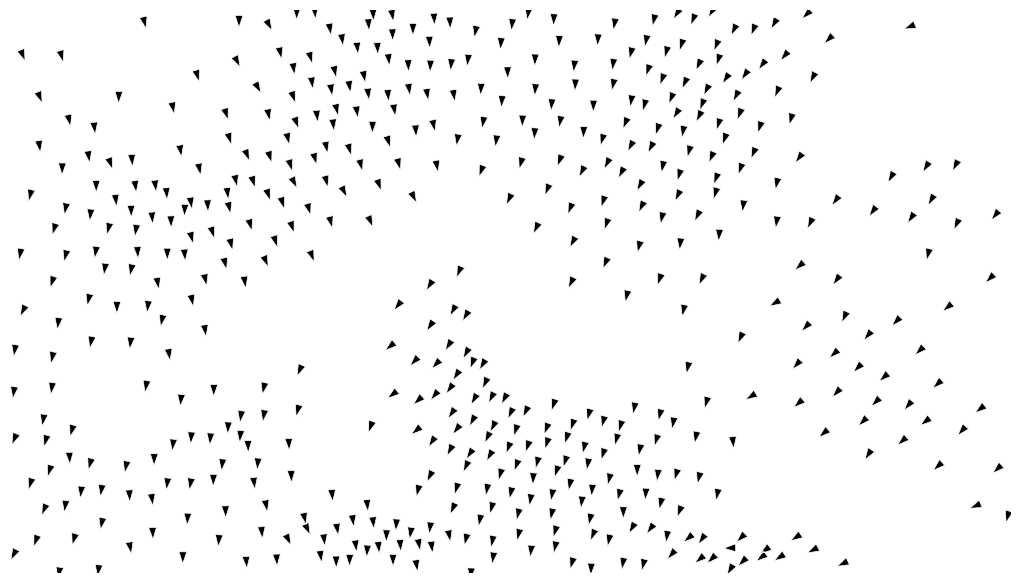

In [8]:
n = 500
width, height = 640, 360
flock = Flock(n)
fig = plt.figure(figsize=(10, 10*height/width), facecolor="white")
ax = fig.add_axes([0.0, 0.0, 1.0, 1.0], aspect=1, frameon=False)
collection = MarkerCollection(n)
ax.add_collection(collection._collection)
ax.set_xlim(0, width)
ax.set_ylim(0, height)
ax.set_xticks([])
ax.set_yticks([])

# Trace
trace = None
if 0:
	trace = np.zeros((height, width))
	im = ax.imshow(trace, extent=[0, width, 0, height], vmin=0, vmax=1,
					interpolation="nearest", cmap=plt.cm.gray_r)

animation = FuncAnimation(fig, update, interval=10, frames=1000)
animation.save('boid.mp4', fps=40, dpi=80, bitrate=-1, codec="libx264",
				extra_args=['-pix_fmt', 'yuv420p'],
				metadata={'artist': 'Nicolas P. Rougier'})
plt.show()

## Thank you.

This small tutorial was made by [Shreyas V](https://github.com/shreyasvinaya).